<span style="font-size: 10px">Namah Siddham

# <span style = "color:green">1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <span style = "color:green">2. Load Data from the CSV File

In [2]:
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# <span style = "color:green">3. Exploratory Data Analysis

In [3]:
# Descriptive Statistics of the Data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


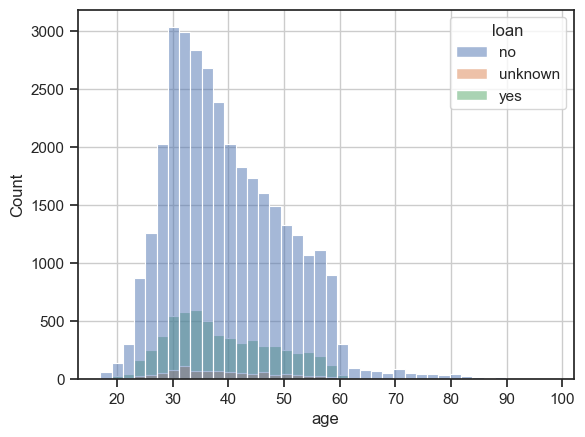

In [61]:
# Distribution Based on Age and Weather Customers Already Have Loan
fig = plt.Figure()
sns.set_style(style='ticks')
sns.histplot(data=df,x='age',bins=40,hue='loan')
plt.grid(True);

Banks are targeting people mostly of age between 30 and 40.

There is no specific objective or right answer to begin with in unsupervised learning as there is no target label. We would want to segment clusters based on some similar characteristics by diving deep into our dataset. So if we are dealing this with the purpose of marketing, we do not want to target people who already have a loan as maybe they will not take another one.

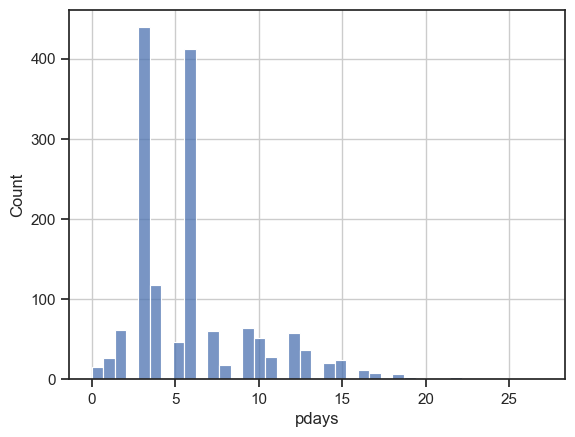

In [58]:
# Plot based on how many days have been passed when they were contacted last by the marketing campaign.

sns.histplot(data=df.query('pdays!=999'),x='pdays')  # 999 means never contacted.
plt.grid(True)

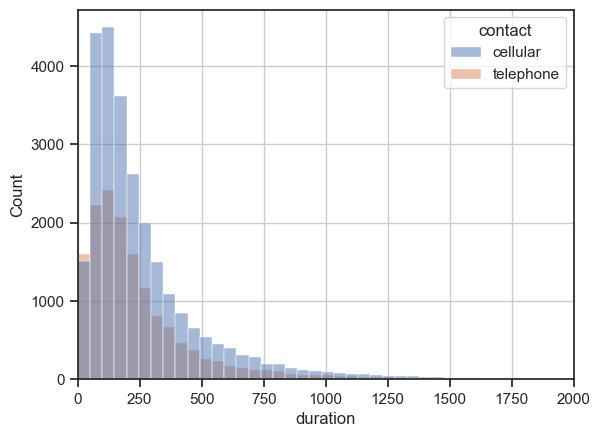

In [59]:
# Distribution of duration of conversation when people were contacted last time either through a landline or a cellular.
sns.histplot(data=df,x='duration',bins=100,hue='contact')  # durations are in seconds
plt.xlim(0,2000)
plt.grid(True);

In few cases, there are very long calls for about 16-18 minutes. This is showing similar behavior weather they are contacted from landline or mobile phone.

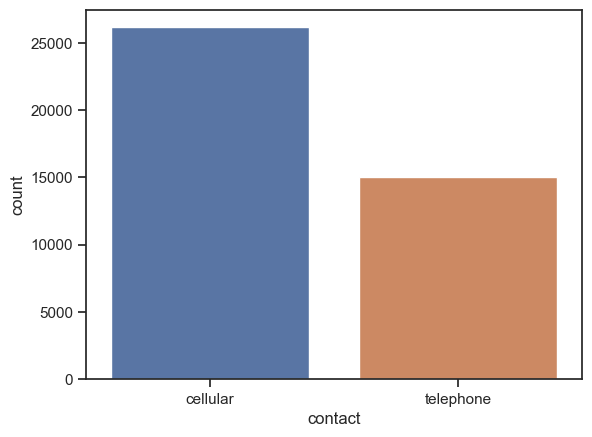

In [62]:
sns.countplot(data=df,x='contact');

The number of cell phone contacts is more than landline, but it does not matter since the durations for both types of contacts are roughly the same as it can be seen in histogram.

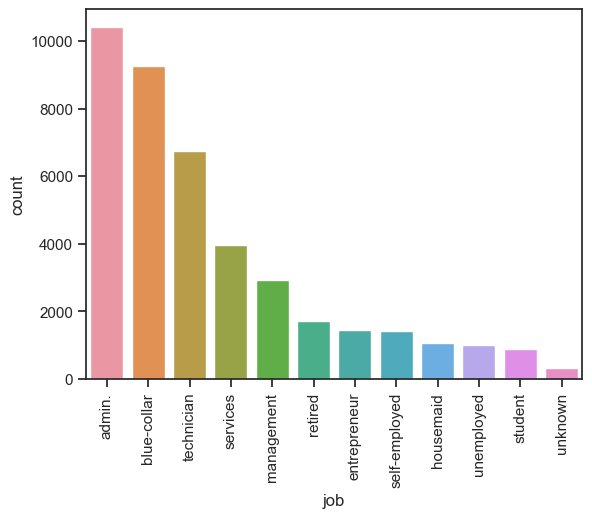

In [63]:
# Exploring Job Categories
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)  # sorting in descending order
plt.xticks(rotation=90);

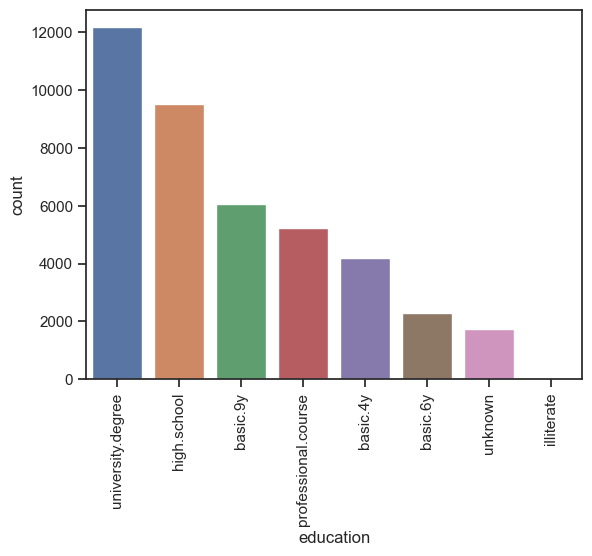

In [64]:
# Exploring Education Categories
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90);

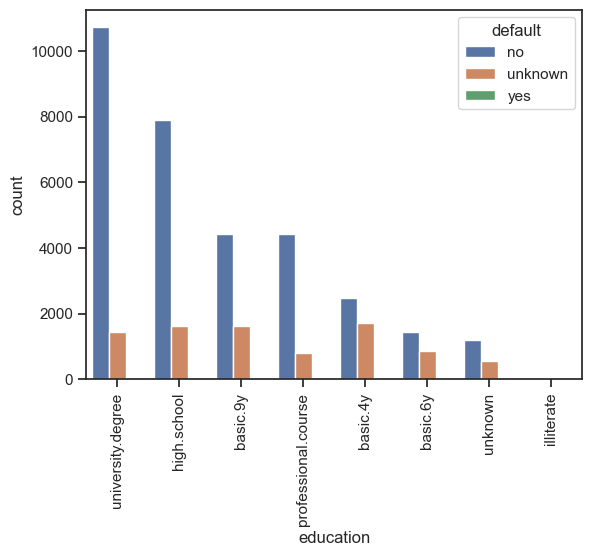

In [65]:
# Checking if there is some sort of relationship between education level and weather they default on loan or not
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=90);

There are hardly any people who has defaulted on loan. there are some unknowns and that could be because of ongoing loan.

In [11]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

There are only 3 defaults. it is possible that most people do not have loan to begin with that is why this number could be too low.

In [12]:
df['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

As assumed, most people does not have a loan.

# <span style = "color:green">4. Data Preparation

Encoding categorical variables as K-means is distance-based unsupervised learning. Also, we do not have to worry much about dropping 1st column from dummies and also multi-collinearity as it is unsupervised learning and there won't be any coefficient attached to these features.

In [13]:
X = pd.get_dummies(df)  # Encoding all categorical columns
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,False,True
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,True,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,True,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,False,True


getting True or False instead of 0 or 1. It is possibly due to it is not identifying those columns as categorical columns.

In [14]:
# Checking data types
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribed         object
dtype: object

In [15]:
# Converting columns to a category type
columns=[]
for col in df.columns:
    if df[col].dtype=='object':
        columns.append(col)
df[columns] = df[columns].astype('category')
df.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
subscribed        category
dtype: object

In [16]:
# Encoding all Categorical Columns
X = pd.get_dummies(df)
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False


In [17]:
X = pd.get_dummies(df)
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


# <span style = "color:green">5. Scaling Data as it is distance based metric

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# <span style = "color:green">6. Fitting K-Means Clustering Model

### <span style = "color:orange">6.1 Defining and Fitting Model

In [19]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)  # Assumption starting with 2 groups - group of people the bank wants to market to, and group of people the bank do not want to market to.
cluster_labels = model.fit_predict(scaled_X)  # Since it is unsupervised learning, there is no separate train and test set, so we can use fit_predict on the whole set.
cluster_labels

C:\Users\SGangwal\OneDrive - Tridel\Python Development\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 1, 1, 1])

### <span style = "color:orange">6.2 Adding Cluster Column to Show the Cluster Group for Each Instance

In [20]:
X['Cluster'] = cluster_labels
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,1
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,1


### <span style = "color:orange">6.3 Checking Correlation of Each Feature with the Cluster

In [21]:
X.corr()['Cluster'].iloc[:-1].sort_values(ascending=False)

previous                0.478442
poutcome_failure        0.464271
contact_cellular        0.410402
month_apr               0.357904
subscribed_yes          0.294587
                          ...   
poutcome_nonexistent   -0.544348
cons.price.idx         -0.679421
nr.employed            -0.886188
emp.var.rate           -0.932658
euribor3m              -0.959350
Name: Cluster, Length: 65, dtype: float64

It shows what features are being strongly considered for clustering.

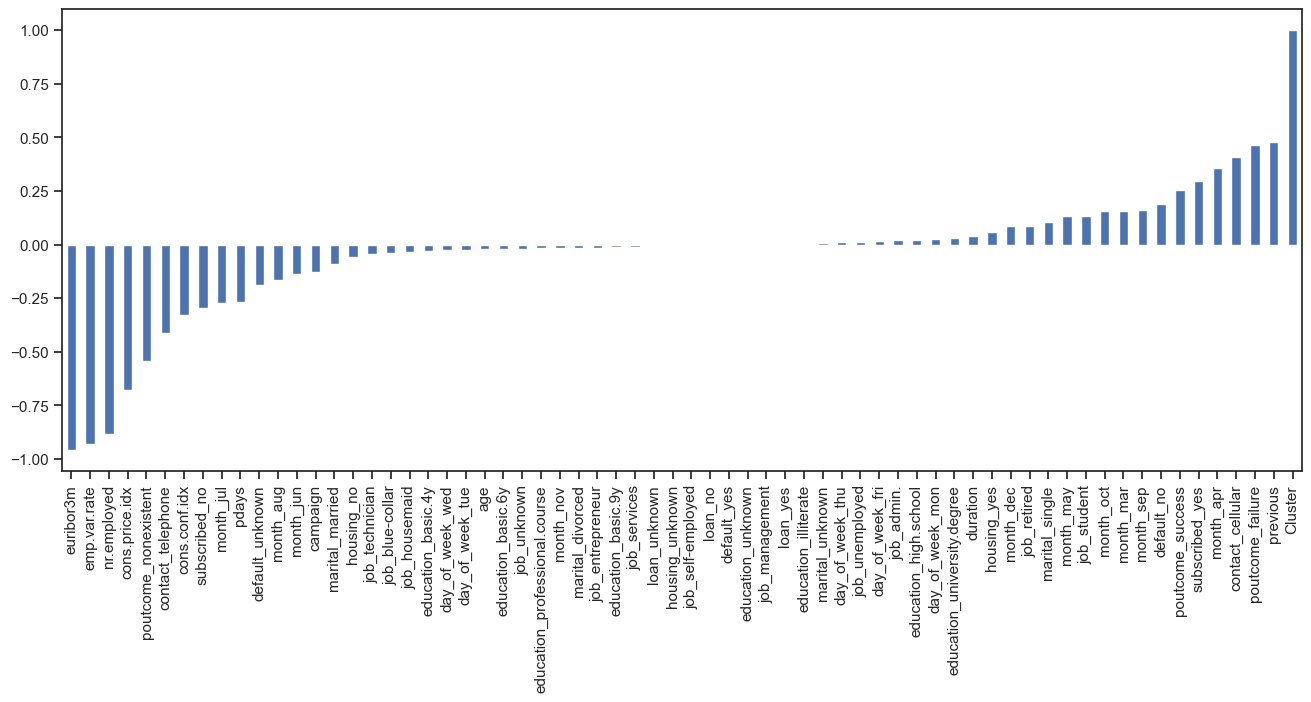

In [67]:
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar',figsize=(16,6));

Since, we have the idea of what features are being strongly considered, we can next talk to domain expert to understand what these clusters actually represent.

Other Methods to Interpret the Results

Understanding how original variables distinguish between clusters, one approach could be to examine the mean (or median if appropriate) of each feature within each cluster. This can give an understanding of how different variables differentiate the clusters.

For non-numeric variables, we can look at the distribution of categories within each cluster. For example, if a categorical feature has three classes A, B, and C, we can analyze the proportion of these classes in each cluster.

However, there are other ways to determine which features are most important for cluster assignment:

Feature importance in cluster centroids: For each cluster, you can examine its centroid (the mean value of all points in that cluster, in the feature space). The relative values of different features in the centroid can give you an idea about which features are most distinctive for that cluster.

Statistical tests: For numeric features, you can perform a statistical test (such as ANOVA) to see if the mean value of a given feature is significantly different among clusters. For categorical features, a Chi-square test can be used to test for independence between the categorical feature and the cluster assignments.

Decision trees: Another method is to use a decision tree, treating the cluster assignments as the target variable and the original features as predictors. The tree can help identify which features are most helpful in predicting the cluster assignment. Note that the decision tree might not perfectly recreate the clusters, especially for complex or subtle cluster structures, but it can provide a simple, interpretable model of which features are most associated with each cluster.

### <span style = "color:orange">6.4 Using One-Way ANOVA Test to determine which features are significantly different across the clusters

In [23]:
import scipy.stats as stats
for col in X.columns:
    f_statistic, p_value = stats.f_oneway(X.query('Cluster==0')[col], X.query('Cluster==1')[col])
    print(f'p-value for {col}: {p_value:.2f}')

p-value for age: 0.00
p-value for duration: 0.00
p-value for campaign: 0.00
p-value for pdays: 0.00
p-value for previous: 0.00
p-value for emp.var.rate: 0.00
p-value for cons.price.idx: 0.00
p-value for cons.conf.idx: 0.00
p-value for euribor3m: 0.00
p-value for nr.employed: 0.00
p-value for job_admin.: 0.00
p-value for job_blue-collar: 0.00
p-value for job_entrepreneur: 0.00
p-value for job_housemaid: 0.00
p-value for job_management: 0.62
p-value for job_retired: 0.00
p-value for job_self-employed: 0.36
p-value for job_services: 0.02
p-value for job_student: 0.00
p-value for job_technician: 0.00
p-value for job_unemployed: 0.01
p-value for job_unknown: 0.00
p-value for marital_divorced: 0.00
p-value for marital_married: 0.00
p-value for marital_single: 0.00
p-value for marital_unknown: 0.05
p-value for education_basic.4y: 0.00
p-value for education_basic.6y: 0.00
p-value for education_basic.9y: 0.01
p-value for education_high.school: 0.00
p-value for education_illiterate: 0.39
p-value

C:\Users\SGangwal\OneDrive - Tridel\Python Development\venv\lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


The p-value from a statistical test like ANOVA represents the probability that the observed data would occur by random chance under the null hypothesis. The null hypothesis in an ANOVA is that there is no difference between the group means. A p-value of 0.00 suggests that it is extremely unlikely that the observed data occurred by random chance, and therefore the null hypothesis is rejected, indicating that there is a statistically significant difference between the group means.

A p-value of 0.00 for a feature suggests that the mean value of that feature is significantly different across the different clusters. This can be interpreted as the feature being important for distinguishing between the clusters.

On the other hand, features with a higher p-value (closer to 1) are not as significant in distinguishing between clusters. For instance, features like 'job_management', 'job_self-employed', 'education_unknown', 'default_yes', 'loan_no', 'loan_yes', 'loan_unknown', 'housing_unknown' have relatively high p-values, which suggests these features are not significantly different across clusters.

### <span style = "color:orange">6.5 Elbow Method to Find Reasonable K-Value

In [24]:
ssd = []
for k in range(2,10):
    model = KMeans(n_clusters=k,n_init='auto')
    model.fit(scaled_X)
    ssd.append(model.inertia_)  # SSD of Point from it's cluster center
ssd

[2469792.4245023234,
 2370787.706722859,
 2271502.818099975,
 2243653.2654854152,
 2221707.3735490423,
 2173406.311059516,
 2109166.1252532382,
 2073423.7261891668]

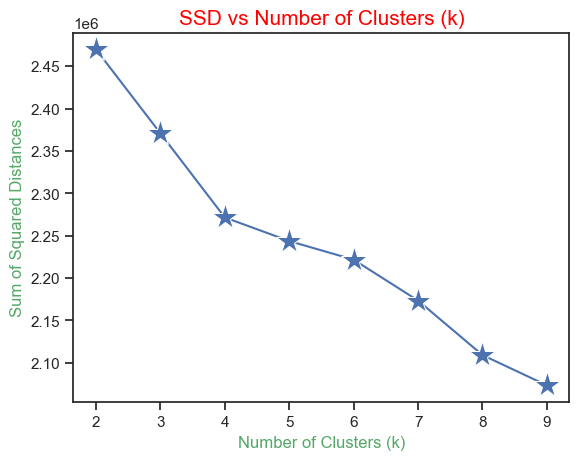

In [68]:
sns.lineplot(x=np.arange(2,10),y=ssd,marker='*',markersize=20)
plt.title('SSD vs Number of Clusters (k)',fontdict={'color':'red','size':15})
plt.xlabel('Number of Clusters (k)',color='g')
plt.ylabel('Sum of Squared Distances',color='g');

By observing the values, we see a substantial decrease in the inertia from k=5 to k=6, and then from k=6 to k=7. After k=7, the inertia increases at k=8, and then decreases again at k=9. This indicates that the inertia starts to stabilize around k=7, suggesting that k=7 might be the optimal number of clusters. This is assuming that the elbow method is an appropriate approach for your specific problem and data.

The elbow method is heuristic, meaning that it provides a rule of thumb for making an informed choice, but it doesn't necessarily guarantee the absolute best solution. In practice, the choice of k can be informed by domain knowledge, the specific use case, and other criteria.

In [26]:
pd.Series(ssd).diff()  # difference between ssd at k and ssd at k-1

0             NaN
1   -99004.717779
2   -99284.888623
3   -27849.552615
4   -21945.891936
5   -48301.062490
6   -64240.185806
7   -35742.399064
dtype: float64

### <span style = "color:orange">6.6 Refitting the model using 7 clusters

In [27]:
model = KMeans(n_clusters=7,n_init='auto')
cluster_labels = model.fit_predict(scaled_X)
cluster_labels

array([3, 3, 3, ..., 4, 4, 1])

In [28]:
X['Cluster_Label'] = cluster_labels
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster,Cluster_Label
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,3
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,3
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,3
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,3
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,3


The above dataframe contains two columns for cluster labels, one with k=2 and one with k=7 after finding optimum k value using elbow method.

### <span style = "color:orange">6.7 Labels and Centriods

In [29]:
labels = model.labels_  # cluster labels
labels

array([3, 3, 3, ..., 4, 4, 1])

In [30]:
centroids = model.cluster_centers_  # coordinates for the 7 clusters
centroids

array([[-2.38464876e-02, -5.28970328e-02,  1.23082057e-02,
         1.95413900e-01, -1.40830666e-01, -4.30697361e-02,
        -4.05504212e-03,  9.45258643e-02,  7.81181544e-03,
        -1.36581002e-02, -5.82022825e-01, -5.38316990e-01,
        -1.91430209e-01, -1.62528368e-01, -2.76435300e-01,
        -2.08757296e-01, -1.89032128e-01, -3.26556400e-01,
        -1.47326702e-01, -4.42449272e-01,  6.29438872e+00,
        -8.98707607e-02,  4.92437485e-02,  5.09657197e-02,
        -9.73854554e-02,  7.55502284e-02,  3.06584352e-02,
        -9.10569444e-02,  1.12317473e-01,  4.44211358e-02,
        -2.09096045e-02,  3.22400435e-02, -7.47382757e-02,
        -1.14923663e-01, -9.81279913e-02,  9.57269404e-02,
         1.14938906e-01, -5.72996692e-02,  2.88249923e-02,
         4.82615180e-02, -6.17827699e-03,  2.88249923e-02,
        -5.75225999e-03, -9.27374410e-02,  9.27374410e-02,
        -5.01630793e-02, -8.95524010e-02,  1.28144557e-02,
        -6.37343155e-03,  1.30315031e-01,  3.86763003e-0

# <span style = "color:green">7. Next Possible Steps

Depending on specific use case and domain knowledge, the clusters can be studied for similar characteristics and model can be redefined accordingly.